In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import Normalizer

In [2]:
# Charging the dataset
df=pd.read_csv('Data.csv', index_col=0)
df.head()

,Type_of_cement,Brand,Additives,Type_of_aggregates,Design_F'c (Mpa),Curing_age_(days),Cs_(Mpa),Ts_(Mpa),Fs_(Mpa),Er_(ohm-cm),UPV_(m/s)
0,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.2154,0.5609,NaN,5.8654,2440.2989
1,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.1528,0.5727,NaN,5.9471,2417.9562
2,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.6877,0.5826,NaN,5.9965,2429.9277
3,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.1476,0.5910,NaN,5.8751,2435.0202
4,CPO 30R RS BRA,CEMEX,Opuntia_ficus_indica,Rounded,25,3,5.3406,0.5698,NaN,5.8654,2408.7969


In [3]:
df.columns

Index(['Type_of_cement', 'Brand', 'Additives', 'Type_of_aggregates',
       'Design_F'c (Mpa)', 'Curing_age_(days)', 'Cs_(Mpa)', 'Ts_(Mpa)',
       'Fs_(Mpa)', 'Er_(ohm-cm)', 'UPV_(m/s)'],
      dtype='object')

In [4]:
# Para este caso el objetivo es el Fs
df_new = df[["Design_F'c (Mpa)",'Curing_age_(days)', 'Er_(ohm-cm)', 'UPV_(m/s)', 'Cs_(Mpa)']]
df_new.head()

,Design_F'c (Mpa),Curing_age_(days),Er_(ohm-cm),UPV_(m/s),Cs_(Mpa)
0,25,3,5.8654,2440.2989,5.2154
1,25,3,5.9471,2417.9562,5.1528
2,25,3,5.9965,2429.9277,5.6877
3,25,3,5.8751,2435.0202,5.1476
4,25,3,5.8654,2408.7969,5.3406


In [5]:
df_new = df_new.dropna(axis=0)

In [6]:
df_new.dtypes

Design_F'c (Mpa)       int64
Curing_age_(days)      int64
Er_(ohm-cm)          float64
UPV_(m/s)            float64
Cs_(Mpa)             float64
dtype: object

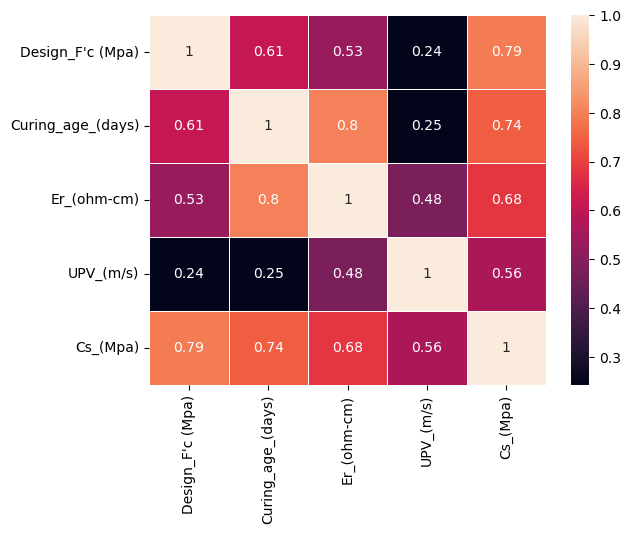

In [7]:
sns.heatmap(df_new.corr("pearson"), annot=True, linewidth=0.5);

c:\Users\TORIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\TORIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\TORIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\TORIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

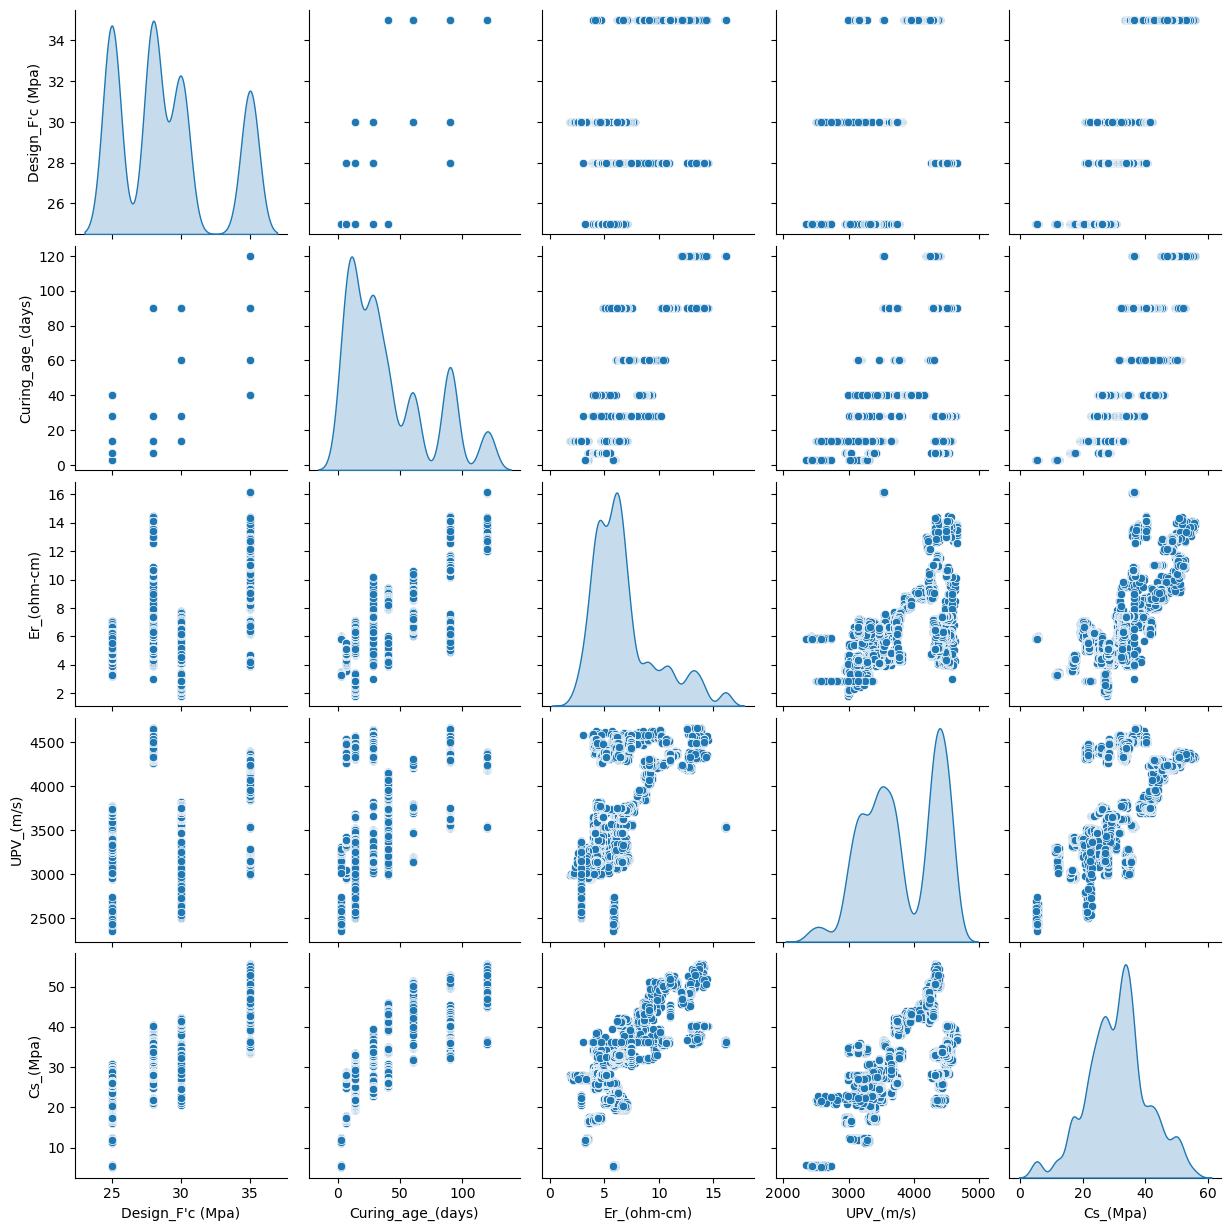

In [8]:
#Distribución de los datos
sns.pairplot(df_new,kind='scatter',diag_kind="kde")

In [9]:
#Vamos a guardar nuestro nuevo conjunto de datos después de haber hecho la limpieza por la desviación estándar
df_new.to_csv('df_Cs.csv', header=None, index=False)
df_new

,Design_F'c (Mpa),Curing_age_(days),Er_(ohm-cm),UPV_(m/s),Cs_(Mpa)
0,25,3,5.8654,2440.2989,5.2154
1,25,3,5.9471,2417.9562,5.1528
2,25,3,5.9965,2429.9277,5.6877
3,25,3,5.8751,2435.0202,5.1476
4,25,3,5.8654,2408.7969,5.3406
...,...,...,...,...,...
4415,28,90,14.1372,4534.8137,40.1515
4416,28,90,14.1372,4532.4847,40.1515
4417,28,90,14.1372,4511.0457,40.1515
4418,28,90,14.1372,4537.9405,40.1515


In [10]:
# Ahora vamos a cargar el conjunto de datos en un archivo de texto .txt
df_clean = np.loadtxt('df_Cs.csv',delimiter=',')
#Es importante notar que si no hubiera hecho el index=False entonces abajo en lugar de un 0 iria un 1

In [11]:
# Estos datos son datos no escalados y todos serviran como datos de entrada
# Aqui es donde se define que todas las columnas menos la utilma serán datos de entrada
X = df_clean[:,0:-1]
X.shape

(4420, 4)

In [12]:
# The targets are in the last column. That's how datasets are conventionally organized.
# En esta parte estamos definiendo que la ultima columna sera el objetivo
y = df_clean[:,-1]
y.shape

(4420,)

## Normalizing the inputs

In [13]:
# Create normalizer
normalizer = Normalizer(norm='l2')

In [14]:
# Normalizing features
normalized_vector = normalizer.fit_transform(X)

In [15]:
# Creamos un split de datos
X_train, X_test, y_train, y_test = train_test_split(normalized_vector, y, test_size=0.3, random_state=100)

In [16]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.3, random_state=100)

In [17]:
print("The samples number for the training size is:", X_train.shape[0])
print("The samples number for the testing size is:", X_test.shape[0])
print("The samples number for the validation size is:", X_valid.shape[0])

The samples number for the training size is: 3094
The samples number for the testing size is: 928
The samples number for the validation size is: 398


In [18]:
# Es necesario guardar los 3 conjuntos de datos anteriores en .npz
# Save the three datasets in *.npz.
# You will see that it is extremely valuable to name them in such a coherent way!
np.savez('Data_train', inputs=X_train, targets=y_train)
np.savez('Data_test', inputs=X_test, targets=y_test)
np.savez('Data_valid', inputs=X_valid, targets=y_valid)